# NLTK 자연어 처리 패키지

### 말뭉치

In [1]:
import nltk
nltk.download("book", quiet=True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:1302])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

### 토큰 생성

In [5]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:1000])[3])

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [6]:
from nltk.tokenize import word_tokenize
word_tokenize(emma_raw[50:100])

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [7]:
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
retokenize.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

### 형태소 분석

- 어간 추출

In [8]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ["fly", "flies", "flying", "flew", "flown"]

print("Porter Stemmer   :", [st1.stem(w) for w in words])
print("Lancaster Stemmer:", [st2.stem(w) for w in words])

Porter Stemmer   : ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer: ['fly', 'fli', 'fly', 'flew', 'flown']


- 원형 복원

In [9]:
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

[lm.lemmatize(w, pos="v") for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

### 품사 부착
- NNP: 단수 고유명사
- VB: 동사
- VBP: 동사 현재형
- TO: to 전치사
- NN: 명사(단수형 혹은 집합형)
- DT: 관형사

In [10]:
nltk.help.upenn_tagset("VB")

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [11]:
from nltk.tag import pos_tag
sentence = "Emma refused to permit us to obtain the refuse permit"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [12]:
# 명사 추출
nouns_list = [t[0] for t in tagged_list if t[1] == "NN"]
nouns_list

['refuse', 'permit']

In [13]:
from nltk.tag import untag
untag(tagged_list)

['Emma',
 'refused',
 'to',
 'permit',
 'us',
 'to',
 'obtain',
 'the',
 'refuse',
 'permit']

In [14]:
def tokenizer(doc):
    return ["/".join(p) for p in tagged_list]

tokenizer(sentence)

['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

### 그래프 처리

In [15]:
# Matplotlib 사용과 한글 처리를 위한 Code
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False    # minus 표시
mpl.rc('font', family='Malgun Gothic')
%matplotlib inline

In [20]:
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams["font.size"] = 14

### Text 클래스

In [18]:
from nltk import Text

text = Text(retokenize.tokenize(emma_raw))

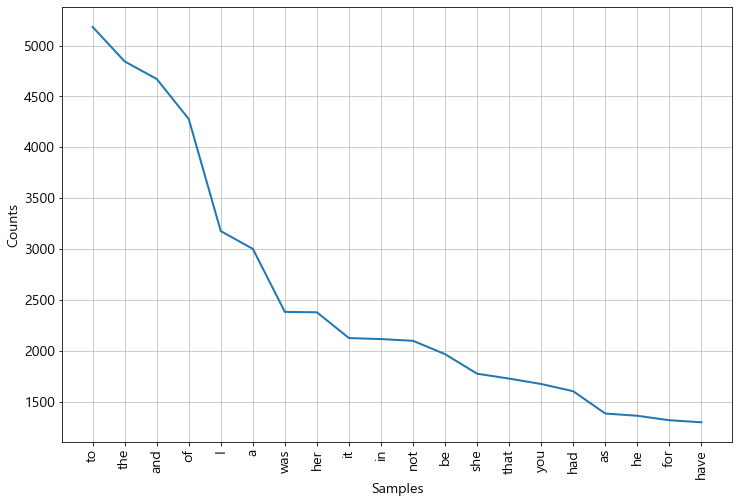

In [21]:
text.plot(20)
plt.show()

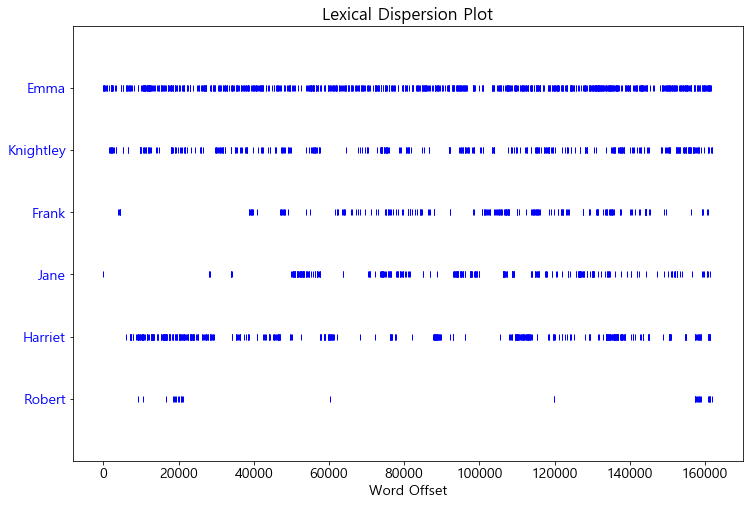

In [22]:
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

In [23]:
text.concordance("Emma")

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [24]:
text.similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [25]:
text.common_contexts(["Emma", "she"])

but_was and_could that_should said_and which_could whom_knew
which_particularly and_imagined that_could said_i that_began
and_thought do_was but_could than_had said_but manner_was this_could
as_saw possible_could


### FreqDist

In [26]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

In [27]:
from nltk import FreqDist

stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
emma_tokens = pos_tag(retokenize.tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)

In [28]:
# 전체 단어의 수, "Emma"라는 단어의 출현 횟수, 확률
fd_names.N(), fd_names["Emma"], fd_names.freq("Emma")

(7863, 830, 0.10555767518758744)

In [29]:
fd_names.most_common(5)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385)]

### 워드클라우드

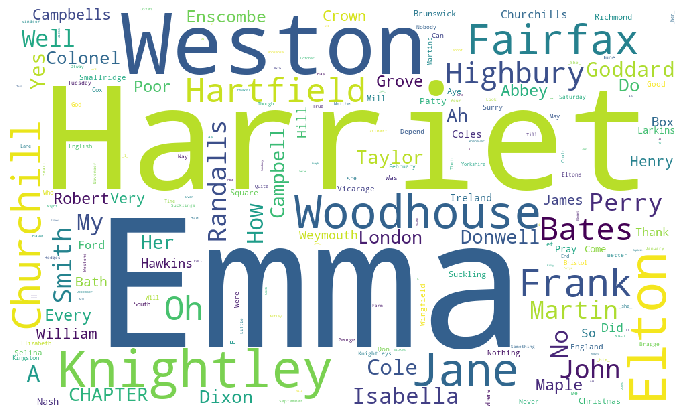

In [30]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color="white", 
               random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()

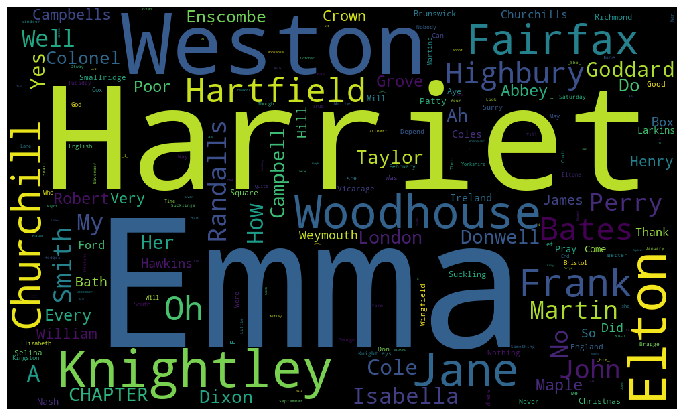

In [32]:
wc = WordCloud(width=1000, height=600, background_color="black", 
               random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()

# KoNLPy

In [33]:
import warnings
warnings.simplefilter("ignore")

import konlpy
konlpy.__version__

'0.5.2'

### 말뭉치

In [34]:
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [35]:
c = kolaw.open('constitution.txt').read()
print(c[:40])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로


In [36]:
from konlpy.corpus import kobill
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [37]:
d = kobill.open('1809890.txt').read()
print(d[:40])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호


### 형태소 분석

In [39]:
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
okt = Okt()

### 공통 메소드
- nouns : 명사 추출
- morphs : 형태소 추출
- pos : 품사 부착

In [40]:
hannanum.nouns(c[:40])

['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동']

In [41]:
kkma.nouns(c[:40])

['대한',
 '대한민국',
 '대한민국헌법',
 '민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '3',
 '1',
 '1운동',
 '운동']

In [42]:
okt.nouns(c[:40])

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동']

- 형태소 추출

In [43]:
hannanum.morphs(c[:40])

['대한민국헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛',
 '나는',
 '우리',
 '대한국민',
 '은',
 '3·1운동',
 '으로']

In [44]:
kkma.morphs(c[:40])

['대한민국',
 '헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛나',
 '는',
 '우리',
 '대하',
 'ㄴ',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로']

In [45]:
okt.morphs(c[:40])

['대한민국',
 '헌법',
 '\n\n',
 '유구',
 '한',
 '역사',
 '와',
 '전통',
 '에',
 '빛나는',
 '우리',
 '대',
 '한',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로']

- 품사 부착

In [46]:
hannanum.pos(c[:40])

[('대한민국헌법', 'N'),
 ('유구', 'N'),
 ('하', 'X'),
 ('ㄴ', 'E'),
 ('역사', 'N'),
 ('와', 'J'),
 ('전통', 'N'),
 ('에', 'J'),
 ('빛', 'N'),
 ('나는', 'J'),
 ('우리', 'N'),
 ('대한국민', 'N'),
 ('은', 'J'),
 ('3·1운동', 'N'),
 ('으로', 'J')]

In [47]:
kkma.pos(c[:40])

[('대한민국', 'NNG'),
 ('헌법', 'NNG'),
 ('유구', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETD'),
 ('역사', 'NNG'),
 ('와', 'JC'),
 ('전통', 'NNG'),
 ('에', 'JKM'),
 ('빛나', 'VV'),
 ('는', 'ETD'),
 ('우리', 'NNM'),
 ('대하', 'VV'),
 ('ㄴ', 'ETD'),
 ('국민', 'NNG'),
 ('은', 'JX'),
 ('3', 'NR'),
 ('·', 'SP'),
 ('1', 'NR'),
 ('운동', 'NNG'),
 ('으로', 'JKM')]

In [48]:
okt.pos(c[:40])

[('대한민국', 'Noun'),
 ('헌법', 'Noun'),
 ('\n\n', 'Foreign'),
 ('유구', 'Noun'),
 ('한', 'Josa'),
 ('역사', 'Noun'),
 ('와', 'Josa'),
 ('전통', 'Noun'),
 ('에', 'Josa'),
 ('빛나는', 'Verb'),
 ('우리', 'Noun'),
 ('대', 'Modifier'),
 ('한', 'Modifier'),
 ('국민', 'Noun'),
 ('은', 'Josa'),
 ('3', 'Number'),
 ('·', 'Punctuation'),
 ('1', 'Number'),
 ('운동', 'Noun'),
 ('으로', 'Josa')]

In [49]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [51]:
import pandas as pd
tagsets = pd.DataFrame()
N = 67
tagsets["Hannanum-기호"] = list(hannanum.tagset.keys()) + list("*" * (N - len(hannanum.tagset)))
tagsets["Hannanum-품사"] = list(hannanum.tagset.values()) + list("*" * (N - len(hannanum.tagset)))
tagsets["Kkma-기호"] = list(kkma.tagset.keys()) + list("*" * (N - len(kkma.tagset)))
tagsets["Kkma-품사"] = list(kkma.tagset.values()) + list("*" * (N - len(kkma.tagset)))
tagsets["OKT-기호"] = list(okt.tagset.keys()) + list("*" * (N - len(okt.tagset)))
tagsets["OKT-품사"] = list(okt.tagset.values()) + list("*" * (N - len(okt.tagset)))
tagsets

,Hannanum-기호,Hannanum-품사,Kkma-기호,Kkma-품사,OKT-기호,OKT-품사
0,E,어미,EC,연결 어미,Adjective,형용사
1,EC,연결 어미,ECD,의존적 연결 어미,Adverb,부사
2,EF,종결 어미,ECE,대등 연결 어미,Alpha,알파벳
3,EP,선어말어미,ECS,보조적 연결 어미,Conjunction,접속사
4,ET,전성 어미,EF,종결 어미,Determiner,관형사
...,...,...,...,...,...,...
62,*,*,XPV,용언 접두사,*,*
63,*,*,XR,어근,*,*
64,*,*,XSA,형용사 파생 접미사,*,*
65,*,*,XSN,명사파생 접미사,*,*


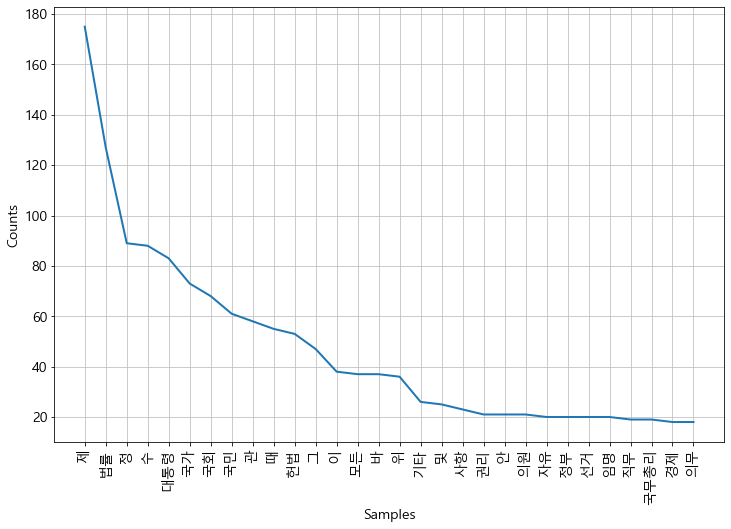

In [52]:
kolaw = Text(okt.nouns(c), name="kolaw")
kolaw.plot(30)
plt.show()

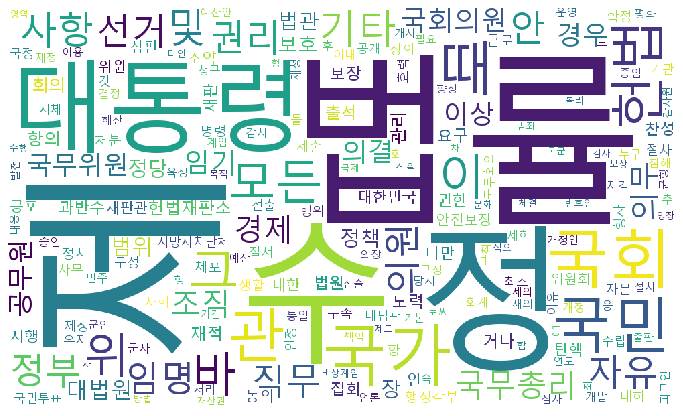

In [57]:
font_path = 'c:/windows/fonts/malgun.ttf'

wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis("off")
plt.show()